## QBS 108: Applied Machine Learning
---
Homework 1

Attribute Information

    0. age
    1. sex
    2. chest pain type (4 values)
    3. resting blood pressure
    4. serum cholestoral in mg/dl
    5. fasting blood sugar > 120 mg/dl
    6. resting electrocardiographic results (values 0, 1, 2)
    7. maximum heart rate achieved
    8. exercise induced angina
    9. oldpeak = ST depression induced by exercise relative to rest
    10. the slope of the peak exercise ST segment
    11. number of major vessls (0-3) colored by fluorosopy
    12. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    13. heart disease: absence = 1, presence = 2

1. Create a Naive Bayes classifier and describe diagnostic performance using F-Score, Sensitivity, Specificity, and Accuracy on the training and validation set.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read in the train data
heart_train = pd.read_csv('hearttrain.csv')
heart_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,255,71.0,0.0,2.0,160.0,302.0,0.0,0.0,162.0,0.0,0.4,1.0,2.0,3.0,1
1,204,55.0,1.0,4.0,160.0,289.0,0.0,2.0,145.0,1.0,0.8,2.0,1.0,7.0,2
2,267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
3,92,54.0,1.0,4.0,124.0,266.0,0.0,2.0,109.0,1.0,2.2,2.0,1.0,7.0,2
4,149,41.0,0.0,3.0,112.0,268.0,0.0,2.0,172.0,1.0,0.0,1.0,0.0,3.0,1


In [3]:
y_train = heart_train['13']

del heart_train['13']
del heart_train['Unnamed: 0']

heart_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,71.0,0.0,2.0,160.0,302.0,0.0,0.0,162.0,0.0,0.4,1.0,2.0,3.0
1,55.0,1.0,4.0,160.0,289.0,0.0,2.0,145.0,1.0,0.8,2.0,1.0,7.0
2,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
3,54.0,1.0,4.0,124.0,266.0,0.0,2.0,109.0,1.0,2.2,2.0,1.0,7.0
4,41.0,0.0,3.0,112.0,268.0,0.0,2.0,172.0,1.0,0.0,1.0,0.0,3.0


One hot encode the nominal columns 2, 6, 12 for train, val, and test data set

In [4]:
print(heart_train['2'].unique())
print(heart_train['6'].unique())
print(heart_train['12'].unique())

[2. 4. 3. 1.]
[0. 2. 1.]
[3. 7. 6.]


In [5]:
onehotlab2_1 = []
onehotlab2_2 = []
onehotlab2_3 = []
onehotlab2_4 = []

for i in heart_train['2']:
    if i == 1:
        onehotlab2_1.append(1)
        onehotlab2_2.append(0)
        onehotlab2_3.append(0)
        onehotlab2_4.append(0)
    if i == 2:
        onehotlab2_1.append(0)
        onehotlab2_2.append(1)
        onehotlab2_3.append(0)
        onehotlab2_4.append(0)
    if i == 3:
        onehotlab2_1.append(0)
        onehotlab2_2.append(0)
        onehotlab2_3.append(1)
        onehotlab2_4.append(0)
    if i == 4:
        onehotlab2_1.append(0)
        onehotlab2_2.append(0)
        onehotlab2_3.append(0)
        onehotlab2_4.append(1)
        
heart_train['onehot2_1'] = onehotlab2_1
heart_train['onehot2_2'] = onehotlab2_2
heart_train['onehot2_3'] = onehotlab2_3
heart_train['onehot2_4'] = onehotlab2_4

del heart_train['2']

onehotlab6_0 = []
onehotlab6_1 = []
onehotlab6_2 = []

for i in heart_train['6']:
    if i == 0:
        onehotlab6_0.append(1)
        onehotlab6_1.append(0)
        onehotlab6_2.append(0)
    if i == 1:
        onehotlab6_0.append(0)
        onehotlab6_1.append(1)
        onehotlab6_2.append(0)
    if i == 2:
        onehotlab6_0.append(0)
        onehotlab6_1.append(0)
        onehotlab6_2.append(1)
        
heart_train['onehot6_0'] = onehotlab6_0
heart_train['onehot6_1'] = onehotlab6_1
heart_train['onehot6_2'] = onehotlab6_2

del heart_train['6']

onehotlab12_3 = []
onehotlab12_7 = []
onehotlab12_6 = []

for i in heart_train['12']:
    if i == 3:
        onehotlab12_3.append(1)
        onehotlab12_6.append(0)
        onehotlab12_7.append(0)
    if i == 6:
        onehotlab12_3.append(0)
        onehotlab12_6.append(1)
        onehotlab12_7.append(0)
    if i == 7:
        onehotlab12_3.append(0)
        onehotlab12_6.append(0)
        onehotlab12_7.append(1)
        
heart_train['onehot12_3'] = onehotlab12_3
heart_train['onehot12_6'] = onehotlab12_6
heart_train['onehot12_7'] = onehotlab12_7


del heart_train['12']

heart_train.head()

,0,1,3,4,5,7,8,9,10,11,onehot2_1,onehot2_2,onehot2_3,onehot2_4,onehot6_0,onehot6_1,onehot6_2,onehot12_3,onehot12_6,onehot12_7
0,71.0,0.0,160.0,302.0,0.0,162.0,0.0,0.4,1.0,2.0,0,1,0,0,1,0,0,1,0,0
1,55.0,1.0,160.0,289.0,0.0,145.0,1.0,0.8,2.0,1.0,0,0,0,1,0,0,1,0,0,1
2,56.0,0.0,140.0,294.0,0.0,153.0,0.0,1.3,2.0,0.0,0,1,0,0,0,0,1,1,0,0
3,54.0,1.0,124.0,266.0,0.0,109.0,1.0,2.2,2.0,1.0,0,0,0,1,0,0,1,0,0,1
4,41.0,0.0,112.0,268.0,0.0,172.0,1.0,0.0,1.0,0.0,0,0,1,0,0,0,1,1,0,0


In [6]:
heart_val = pd.read_csv('heartval.csv')
y_val = heart_val['13']

del heart_val['13']
del heart_val['Unnamed: 0']

heart_val.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0.0,7.0
1,56.0,1.0,4.0,130.0,283.0,1.0,2.0,103.0,1.0,1.6,3.0,0.0,7.0
2,57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0
3,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0
4,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0


In [7]:
print(heart_val['2'].unique())
print(heart_val['6'].unique())
print(heart_val['12'].unique())

[1. 4. 3. 2.]
[2. 0. 1.]
[7. 6. 3.]


In [8]:
onehotlab2_1 = []
onehotlab2_2 = []
onehotlab2_3 = []
onehotlab2_4 = []

for i in heart_val['2']:
    if i == 1:
        onehotlab2_1.append(1)
        onehotlab2_2.append(0)
        onehotlab2_3.append(0)
        onehotlab2_4.append(0)
    if i == 2:
        onehotlab2_1.append(0)
        onehotlab2_2.append(1)
        onehotlab2_3.append(0)
        onehotlab2_4.append(0)
    if i == 3:
        onehotlab2_1.append(0)
        onehotlab2_2.append(0)
        onehotlab2_3.append(1)
        onehotlab2_4.append(0)
    if i == 4:
        onehotlab2_1.append(0)
        onehotlab2_2.append(0)
        onehotlab2_3.append(0)
        onehotlab2_4.append(1)
        
heart_val['onehot2_1'] = onehotlab2_1
heart_val['onehot2_2'] = onehotlab2_2
heart_val['onehot2_3'] = onehotlab2_3
heart_val['onehot2_4'] = onehotlab2_4

del heart_val['2']

onehotlab6_0 = []
onehotlab6_1 = []
onehotlab6_2 = []

for i in heart_val['6']:
    if i == 0:
        onehotlab6_0.append(1)
        onehotlab6_1.append(0)
        onehotlab6_2.append(0)
    if i == 1:
        onehotlab6_0.append(0)
        onehotlab6_1.append(1)
        onehotlab6_2.append(0)
    if i == 2:
        onehotlab6_0.append(0)
        onehotlab6_1.append(0)
        onehotlab6_2.append(1)
        
heart_val['onehot6_0'] = onehotlab6_0
heart_val['onehot6_1'] = onehotlab6_1
heart_val['onehot6_2'] = onehotlab6_2

del heart_val['6']

onehotlab12_3 = []
onehotlab12_7 = []
onehotlab12_6 = []

for i in heart_val['12']:
    if i == 3:
        onehotlab12_3.append(1)
        onehotlab12_6.append(0)
        onehotlab12_7.append(0)
    if i == 6:
        onehotlab12_3.append(0)
        onehotlab12_6.append(1)
        onehotlab12_7.append(0)
    if i == 7:
        onehotlab12_3.append(0)
        onehotlab12_6.append(0)
        onehotlab12_7.append(1)
        
heart_val['onehot12_3'] = onehotlab12_3
heart_val['onehot12_6'] = onehotlab12_6
heart_val['onehot12_7'] = onehotlab12_7


del heart_val['12']

heart_val.head()

,0,1,3,4,5,7,8,9,10,11,onehot2_1,onehot2_2,onehot2_3,onehot2_4,onehot6_0,onehot6_1,onehot6_2,onehot12_3,onehot12_6,onehot12_7
0,59.0,1.0,178.0,270.0,0.0,145.0,0.0,4.2,3.0,0.0,1,0,0,0,0,0,1,0,0,1
1,56.0,1.0,130.0,283.0,1.0,103.0,1.0,1.6,3.0,0.0,0,0,0,1,0,0,1,0,0,1
2,57.0,1.0,128.0,229.0,0.0,150.0,0.0,0.4,2.0,1.0,0,0,1,0,0,0,1,0,0,1
3,59.0,1.0,110.0,239.0,0.0,142.0,1.0,1.2,2.0,1.0,0,0,0,1,0,0,1,0,0,1
4,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,2.0,0,0,0,1,0,0,1,0,0,1


In [9]:
heart_test = pd.read_csv('hearttest.csv')
y_test = heart_test['13']

del heart_test['13']
del heart_test['Unnamed: 0']

heart_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0
1,54.0,0.0,3.0,108.0,267.0,0.0,2.0,167.0,0.0,0.0,1.0,0.0,3.0
2,65.0,1.0,4.0,135.0,254.0,0.0,2.0,127.0,0.0,2.8,2.0,1.0,7.0
3,46.0,1.0,4.0,140.0,311.0,0.0,0.0,120.0,1.0,1.8,2.0,2.0,7.0
4,57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0


In [10]:
print(heart_test['2'].unique())
print(heart_test['6'].unique())
print(heart_test['12'].unique())

[3. 4. 2. 1.]
[0. 2.]
[7. 3. 6.]


In [11]:
onehotlab2_1 = []
onehotlab2_2 = []
onehotlab2_3 = []
onehotlab2_4 = []

for i in heart_test['2']:
    if i == 1:
        onehotlab2_1.append(1)
        onehotlab2_2.append(0)
        onehotlab2_3.append(0)
        onehotlab2_4.append(0)
    if i == 2:
        onehotlab2_1.append(0)
        onehotlab2_2.append(1)
        onehotlab2_3.append(0)
        onehotlab2_4.append(0)
    if i == 3:
        onehotlab2_1.append(0)
        onehotlab2_2.append(0)
        onehotlab2_3.append(1)
        onehotlab2_4.append(0)
    if i == 4:
        onehotlab2_1.append(0)
        onehotlab2_2.append(0)
        onehotlab2_3.append(0)
        onehotlab2_4.append(1)
        
heart_test['onehot2_1'] = onehotlab2_1
heart_test['onehot2_2'] = onehotlab2_2
heart_test['onehot2_3'] = onehotlab2_3
heart_test['onehot2_4'] = onehotlab2_4

del heart_test['2']

onehotlab6_0 = []
onehotlab6_2 = []

for i in heart_test['6']:
    if i == 0:
        onehotlab6_0.append(1)
        onehotlab6_2.append(0)
    if i == 2:
        onehotlab6_0.append(0)
        onehotlab6_2.append(1)
        
heart_test['onehot6_0'] = onehotlab6_0
# since the train set and val set had three unique values for column 6, initialize this column with zeros, 
# because our model will be trained expecting this column
heart_test['onehot6_1'] = 0
heart_test['onehot6_2'] = onehotlab6_2

del heart_test['6']

onehotlab12_3 = []
onehotlab12_7 = []
onehotlab12_6 = []

for i in heart_test['12']:
    if i == 3:
        onehotlab12_3.append(1)
        onehotlab12_6.append(0)
        onehotlab12_7.append(0)
    if i == 6:
        onehotlab12_3.append(0)
        onehotlab12_6.append(1)
        onehotlab12_7.append(0)
    if i == 7:
        onehotlab12_3.append(0)
        onehotlab12_6.append(0)
        onehotlab12_7.append(1)
        
heart_test['onehot12_3'] = onehotlab12_3
heart_test['onehot12_6'] = onehotlab12_6
heart_test['onehot12_7'] = onehotlab12_7


del heart_test['12']

heart_test.head()

,0,1,3,4,5,7,8,9,10,11,onehot2_1,onehot2_2,onehot2_3,onehot2_4,onehot6_0,onehot6_1,onehot6_2,onehot12_3,onehot12_6,onehot12_7
0,49.0,1.0,120.0,188.0,0.0,139.0,0.0,2.0,2.0,3.0,0,0,1,0,1,0,0,0,0,1
1,54.0,0.0,108.0,267.0,0.0,167.0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,1,1,0,0
2,65.0,1.0,135.0,254.0,0.0,127.0,0.0,2.8,2.0,1.0,0,0,0,1,0,0,1,0,0,1
3,46.0,1.0,140.0,311.0,0.0,120.0,1.0,1.8,2.0,2.0,0,0,0,1,1,0,0,0,0,1
4,57.0,1.0,150.0,168.0,0.0,174.0,0.0,1.6,1.0,0.0,0,0,1,0,1,0,0,1,0,0


In [12]:
gnb = GaussianNB().fit(heart_train, y_train)
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
tn, fp, fn, tp = confusion_matrix(y_val, gnb.predict(heart_val)).ravel()

print('F1 score: {:.2f}'.format(f1_score(y_val, gnb.predict(heart_val))))
print('Accuracy score: {:.2f}'.format(accuracy_score(y_val, gnb.predict(heart_val))))
print('Sensitivity: {:.2f}'.format(tp/(fp + tp)))
print('Specificity: {:.2f}'.format(tn/(fn + tn)))

F1 score: 0.70
Accuracy score: 0.70
Sensitivity: 0.64
Specificity: 0.79


2. Starting from the MLE of Logistic Regression with regularization, derive the formula for a single stochastic gradient descent update.

Minimize log-likelihood:

$$
\begin{aligned}
ln(L) = \sum_{i}^N y_{i}ln(p(x_{i})) + (1 - y_{i})ln[1 - p(x_{i})] - \lambda ||w||_{2}^{2}
\end{aligned}
$$

where:

$$
\begin{aligned}
p(x_{i}) = \frac{e^{w'x}}{1 + e^{w'x}}
\end{aligned}
$$

for each sample $j$.

For each $w_{t}$ in $w$:
$$
\begin{aligned}
\frac{\partial ln(L)}{\partial w_{t}} ln(L) = \sum_{j}^{N}(y_{j} - p(x_{j}))x_{j} - 2\lambda w_{t}
\end{aligned}
$$

Making the gradient updates:
$$
\begin{aligned}
w_{t+1} = w_{t} + \eta[\sum_{j}^{N}(y_{j} - p(x_{j}))x_{j} - 2\lambda w_{t}]
\end{aligned}
$$

3. Train an L2-regularized logistic regression by stochastic gradient descent on the training heart dataset. Using regularization $\lambda$ = 1e-16, 0.001, 0.01, 0.1, 1. Describe best diagnostic performance using F-Score, Sensitivity, Specificity, and Accuracy and determine the optimum lambda based on the validation heart set, or 5-fold cross validation.

In [14]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss = 'log', penalty = 'l2', alpha = 1e-16, max_iter = 1000, 
                    random_state = 0)
sgd.fit(heart_train, y_train)
        
tn, fp, fn, tp = confusion_matrix(y_val, sgd.predict(heart_val)).ravel()
print('Diagnostic Performance when alpha = 1e-16')
print('-----------------------------------------')
print('F1 score: {:.4f}'.format(f1_score(y_val, sgd.predict(heart_val))))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_val, sgd.predict(heart_val))))
print('Sensitivity: {:.4f}'.format(tp/(fp+tp)))
print('Specificity: {:.4f}'.format(tn/(fn+tn)))

Diagnostic Performance when alpha = 1e-16
-----------------------------------------
F1 score: 0.7385
Accuracy score: 0.6136
Sensitivity: 1.0000
Specificity: 0.5854


In [15]:
sgd = SGDClassifier(loss = 'log', penalty = 'l2', alpha = 0.001, max_iter = 1000, 
                    random_state = 0)
sgd.fit(heart_train, y_train)
        
tn, fp, fn, tp = confusion_matrix(y_val, sgd.predict(heart_val)).ravel()
print('Diagnostic Performance when alpha = 0.001')
print('-----------------------------------------')
print('F1 score: {:.4f}'.format(f1_score(y_val, sgd.predict(heart_val))))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_val, sgd.predict(heart_val))))
print('Sensitivity: {:.4f}'.format(tp/(fp+tp)))
print('Specificity: {:.4f}'.format(tn/(fn+tn)))

Diagnostic Performance when alpha = 0.001
-----------------------------------------
F1 score: 0.7273
Accuracy score: 0.6591
Sensitivity: 0.6923
Specificity: 0.6452


In [16]:
sgd = SGDClassifier(loss = 'log', penalty = 'l2', alpha = 0.01, max_iter = 1000, 
                    random_state = 0)
sgd.fit(heart_train, y_train)
        
tn, fp, fn, tp = confusion_matrix(y_val, sgd.predict(heart_val)).ravel()
print('Diagnostic Performance when alpha = 0.01')
print('----------------------------------------')
print('F1 score: {:.4f}'.format(f1_score(y_val, sgd.predict(heart_val))))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_val, sgd.predict(heart_val))))
print('Sensitivity: {:.4f}'.format(tp/(fp+tp)))
print('Specificity: {:.4f}'.format(tn/(fn+tn)))

Diagnostic Performance when alpha = 0.01
----------------------------------------
F1 score: 0.7368
Accuracy score: 0.6591
Sensitivity: 0.7273
Specificity: 0.6364


In [17]:
sgd = SGDClassifier(loss = 'log', penalty = 'l2', alpha = 0.1, max_iter = 1000, 
                    random_state = 0)
sgd.fit(heart_train, y_train)
        
tn, fp, fn, tp = confusion_matrix(y_val, sgd.predict(heart_val)).ravel()
print('Diagnostic Performance when alpha = 0.1')
print('---------------------------------------')
print('F1 score: {:.4f}'.format(f1_score(y_val, sgd.predict(heart_val))))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_val, sgd.predict(heart_val))))
print('Sensitivity: {:.4f}'.format(tp/(fp+tp)))
print('Specificity: {:.4f}'.format(tn/(fn+tn)))

Diagnostic Performance when alpha = 0.1
---------------------------------------
F1 score: 0.7368
Accuracy score: 0.6591
Sensitivity: 0.7273
Specificity: 0.6364


In [18]:
sgd = SGDClassifier(loss = 'log', penalty = 'l2', alpha = 1, max_iter = 1000, 
                    random_state = 0)
sgd.fit(heart_train, y_train)
        
tn, fp, fn, tp = confusion_matrix(y_val, sgd.predict(heart_val)).ravel()
print('Diagnostic Performance when alpha = 1')
print('-------------------------------------')
print('F1 score: {:.4f}'.format(f1_score(y_val, sgd.predict(heart_val))))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_val, sgd.predict(heart_val))))
print('Sensitivity: {:.4f}'.format(tp/(fp+tp)))
print('Specificity: {:.4f}'.format(tn/(fn+tn)))

Diagnostic Performance when alpha = 1
-------------------------------------
F1 score: 0.7164
Accuracy score: 0.5682
Sensitivity: 1.0000
Specificity: 0.5581


The optimum $\lambda$ based on the validation set is `1e-16` because it has the highest F1-Score.

4. Plot training and validation error for 1000 stochastic gradient descent iterations for the best lambda.

In [19]:
train_error = []
val_error = []

sgd_best = SGDClassifier(loss = 'log', penalty = 'l2', alpha = 1e-16, random_state = 0)
sgd_best.fit(heart_train, y_train)

best = 1
count = -1
bestcount = 0
for i in range(1,1001):
    count += 1
    
    sgd_best.fit(heart_train,y_train, coef_init = sgd_best.coef_)
    
    y_pred_train = sgd_best.predict_proba(heart_train)
    train_loss = log_loss(y_train,y_pred_train)
    
    y_pred_val = sgd_best.predict_proba(heart_val)
    val_loss = log_loss(y_val,y_pred_val)
    
    train_error.append(train_loss)
    val_error.append(val_loss)
    
    if val_loss < best:
        sgd_best = sgd_best
        bestcount = count
        best = val_loss

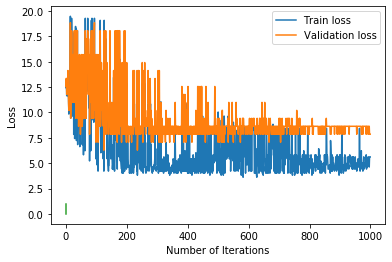

In [20]:
x_plot = np.linspace(0,1,1001)
plt.plot(train_error, label='Train loss')
plt.plot(val_error, label='Validation loss')
plt.plot((bestcount, bestcount), (0,1))
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

5. Return predictions on test set

In [21]:
test_predictions = sgd_best.predict(heart_test)
test_predictions

array([2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 2], dtype=int64)

Text(91.68, 0.5, 'Predicted label')

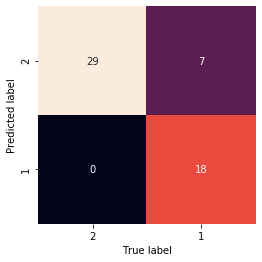

In [22]:
import seaborn as sns
mat = confusion_matrix(y_test, test_predictions)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = y_test.unique(), yticklabels = y_test.unique())
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
print('F1 score: {:.4f}'.format(f1_score(y_test, test_predictions)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, test_predictions)))
print('Sensitivity: {:.4f}'.format(tp/(fp+tp)))
print('Specificity: {:.4f}'.format(tn/(fn+tn)))

F1 score: 0.8923
Accuracy score: 0.8704
Sensitivity: 1.0000
Specificity: 0.8056
